In [1]:
from sympy import *
init_printing()

In [13]:
t = symbols('t',real = True)
VA = Function('V_A')(t)
VB = Function('V_B')(t)
VC = Function('V_C')(t)
x = Function('x')(t)
y = Function('y')(t)
R1,R2,R3,R4,R5,C1,C2 = symbols('R_1,R_2,R_3,R_4,R_5,C_1,C_2',real = True,positive = True)

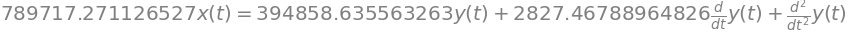

In [5]:
#Low pass
valDictLowPass = {R1 : 3.9894e3,
R2 : 0.8865e3,
R3 : 1e3,
R4 : 1e3,
C1 : 1795e-9,
C2 : 398.94e-9}
dv1 = diff(VB,t)
dv2 = diff(VA-y,t)
eqA = -(x-VA)/R1 + (VA-VB)/R2 + C2*dv2
eqB = -(VA-VB)/R2+C1*dv1
eqC = -(y-VC)/R4 +VC/R3
eq1 = VB-VC
K = 1+(R4/R3)
eq2 = y - K*VB
eqs = [eqA,eqB,eqC,eq1,eq2]
sols = solve(eqs,[VA,VB,VC,x,y])
a2 = (sols[x].subs(sols)).simplify().simplify().expand().coeff(diff(y,t,t))
deq = Eq(((sols[x].subs(sols))/a2).simplify(),x/a2)
deq.simplify().subs(valDictLowPass)

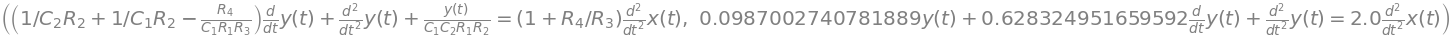

In [11]:
#High pass
valDictHighPass = {R1 : 1784.1e3,
                   R2 : 892.06e3,
                   R3 : 1.0e3,
                   R4 : 1.0e3,
                   C1 : 1784.1e-9,
                   C2 : 3568.2e-9}
a1 = 1/R2/C2+1/R2/C1+(1-K)/R1/C1
a0 = 1/R1/R2/C1/C2
b2 = K
deq = Eq(diff(y,t,t)+a1*diff(y,t)+a0*y,b2*diff(x,t,t))
deq,deq.subs(valDictHighPass)

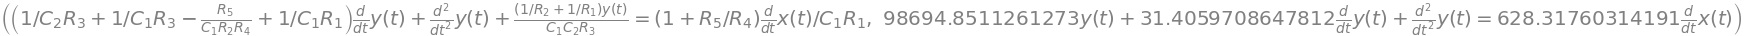

In [16]:
#Band pass
valBandPass = {R1 : 56.419e3,
               R2 : 34.117e3,
               R3 : 149.72e3,
               R4 : 1e3,
               R5 : 1e3,
               C1 : 56.419e-9,
               C2 : 56.419e-9}
a0 = (1/R1+1/R2)/R3/C1/C2
a1 = 1/R1/C1+1/R3/C2+1/R3/C1+(1-K)/R2/C1
K = 1+(R5/R4)
b1 = K/R1/C1

deq = Eq(diff(y,t,t)+a1*diff(y,t)+a0*y,b1*diff(x,t))
deq,deq.subs(valBandPass)